In [22]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1TVvFkcCayHqR-H0W78KvSaxiAUK0RN1T' -O dataset.csv

--2020-08-26 13:27:01--  https://docs.google.com/uc?export=download&id=1TVvFkcCayHqR-H0W78KvSaxiAUK0RN1T
Resolving docs.google.com (docs.google.com)... 74.125.23.102, 74.125.23.138, 74.125.23.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.23.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-6g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u9v952pmaqcif5s23o0glo8jddo2oati/1598448375000/01918661868210824358/*/1TVvFkcCayHqR-H0W78KvSaxiAUK0RN1T?e=download [following]
--2020-08-26 13:27:01--  https://doc-08-6g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u9v952pmaqcif5s23o0glo8jddo2oati/1598448375000/01918661868210824358/*/1TVvFkcCayHqR-H0W78KvSaxiAUK0RN1T?e=download
Resolving doc-08-6g-docs.googleusercontent.com (doc-08-6g-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-08-6g-docs.googleusercontent.com (doc-08-6g-docs.

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [24]:

data=pd.read_csv('dataset.csv', encoding='utf-8')
data

,color,size,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0
...,...,...,...
997,0.927219,0.134986,1.0
998,0.015830,0.481322,0.0
999,0.967964,0.308571,1.0
1000,0.407194,0.465379,0.0


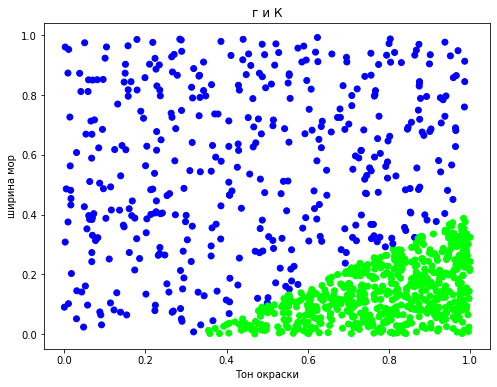

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=data['target'],cmap='brg')
plt.title('г и К')
plt.xlabel('Тон окраски')
plt.ylabel('ширина мор')
plt.show()

In [26]:
x=data.iloc[:,:2].values[:]
x[:5]

array([[0.77942731, 0.25730527],
       [0.77700501, 0.0159154 ],
       [0.97709225, 0.30420962],
       [0.0430319 , 0.1408993 ],
       [0.76043337, 0.19312296]])

In [27]:
y=data['target'].values.reshape((-1,1))[:]
y[:10]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [28]:
import torch

In [29]:
num_features=x.shape[1]
num_features

2

In [159]:


neuron = torch.nn.Sequential(
    
    torch.nn.Linear(num_features, out_features=1),
    torch.nn.Linear(1, out_features=1),
     torch.nn.Sigmoid(),
)
  
neuron

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Linear(in_features=1, out_features=1, bias=True)
  (2): Sigmoid()
)

In [160]:
#torch.autogradпредоставляет классы и функции, реализующие автоматическое дифференцирование
#произвольных скалярных функций. 
neuron(torch.autograd.Variable(torch.FloatTensor([1,1])))
#Variable(tensor)и все еще работают как ожидалось, но они возвращают
#Тензор вместо Переменных.Variable(tensor, requires_grad)


tensor([0.1946], grad_fn=<SigmoidBackward>)

зачем нужен Variable?


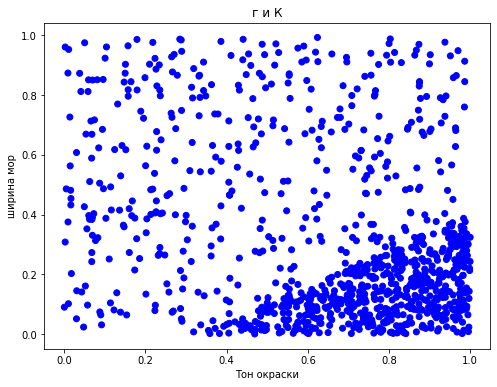

In [161]:
pro_predict=neuron(torch.autograd.Variable(torch.FloatTensor(x)))
y_pred=pro_predict>0.5
#пороговая функция?
y_pred=y_pred.data.numpy().reshape(-1)
plt.figure(figsize=(8,6))
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=y_pred,cmap='brg')
plt.title('г и К')
plt.xlabel('Тон окраски')
plt.ylabel('ширина мор')
plt.show()


In [162]:
x=torch.autograd.Variable(torch.FloatTensor(x))
y=torch.autograd.Variable(torch.FloatTensor(y))

In [163]:
import numpy as np

#loss_f=torch.nn.CrossEntropyLoss()
#CrossEntropy- Этот критерий объединяет nn.LogSoftmax()и nn.NLLLoss()в одном классе
er=[]
k=[]
loss_f = torch.nn.MSELoss(size_average=False)
#MSE-среднеквадратичная ошибка
#loss_f=torch.nn.NLLLoss()
lr=1e-2
# метод оптимизации (SGD - стахостический градиентный спуск)
optimizer=torch.optim.Adamax(neuron.parameters(),lr=lr)
iterrations=1000
for i in range(iterrations):
  k.append(i)
  y_pred=neuron(x)
 # loss = loss_f(y_pred,torch.max(y,1)[1] ) # для кросс энтропии
  loss = loss_f(y_pred, y) 
 # conv=torch.nn.Conv2d(100,2(3,3))
  #m=torch.nn.LogSoftmax(dim=1)
  #loss=loss_f(m(y_pred),y)
  er.append(loss)
  print(f'Iter:{i}->loss:{loss.data}')
  optimizer.zero_grad()
  #обнуления градиентов
  loss.backward()
  optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Iter:0->loss:431.8134765625
Iter:1->loss:428.0240783691406
Iter:2->loss:424.2346496582031
Iter:3->loss:420.4469909667969
Iter:4->loss:416.66290283203125
Iter:5->loss:412.8841552734375
Iter:6->loss:409.1125183105469
Iter:7->loss:405.3507080078125
Iter:8->loss:401.601318359375
Iter:9->loss:397.8670349121094
Iter:10->loss:394.15087890625
Iter:11->loss:390.4562072753906
Iter:12->loss:386.7861022949219
Iter:13->loss:383.14337158203125
Iter:14->loss:379.531005859375
Iter:15->loss:375.95172119140625
Iter:16->loss:372.4080810546875
Iter:17->loss:368.9024658203125
Iter:18->loss:365.4371032714844
Iter:19->loss:362.0140686035156
Iter:20->loss:358.6351623535156
Iter:21->loss:355.3020324707031
Iter:22->loss:352.0168151855469
Iter:23->loss:348.7815856933594
Iter:24->loss:345.5981140136719
Iter:25->loss:342.4677429199219
Iter:26->loss:339.39208984375
Iter:27->loss:336.3720397949219
Iter:28->loss:333.4085998535156
Iter:29->loss:330.50238037109375
Iter:30->loss:327.6540222167969
Iter:31->loss:324.86380

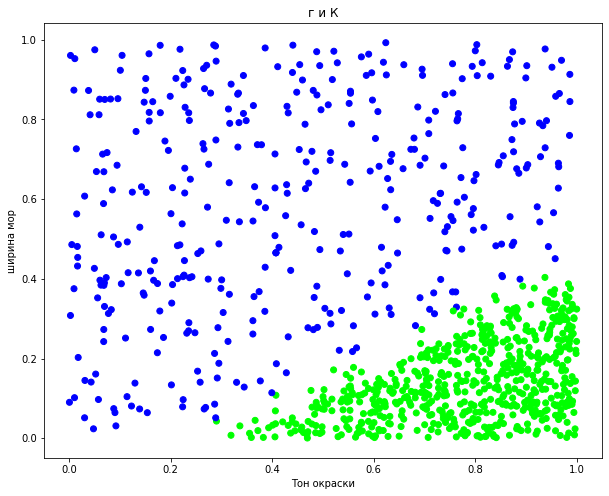

In [164]:
pro_predict=neuron(x)
y_pred=pro_predict>0.5
#пороговая функция?
y_pred=y_pred.data.numpy().reshape(-1)
plt.figure(figsize=(10,8))
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=y_pred,cmap='brg')
plt.title('г и К')
plt.xlabel('Тон окраски')
plt.ylabel('ширина мор')
plt.show()

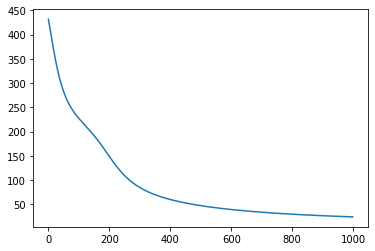

In [165]:

plt.plot(er)

In [166]:
za=int(er[0])

In [55]:
za

261

In [56]:
er[0]

tensor(261.3932, grad_fn=<MseLossBackward>)

In [57]:

y_pred

array([ True,  True,  True, ...,  True, False, False])